**Loadnig Important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Loading Dataset***

In [2]:
titanic_df = pd.read_csv('/content/Titanic_Dataset.csv')
titanic_df.head()   # Previewing first five entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking Info of Dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*We can see Titanic Dataset containing 891 entries(rows) indexing 0-890 and 12 Columns indexing 0-11.*

*Age Column, Cabin column and Cabin column consist of missing values and rest seems fine.*

*We can see 5 object columns, 5 int columns and 2 float columns in the Dataset.*


In [4]:
#checking for null Values
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Handling Missing Values in Age and Embarked Column**

<ipython-input-5-2cf48b7e87c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

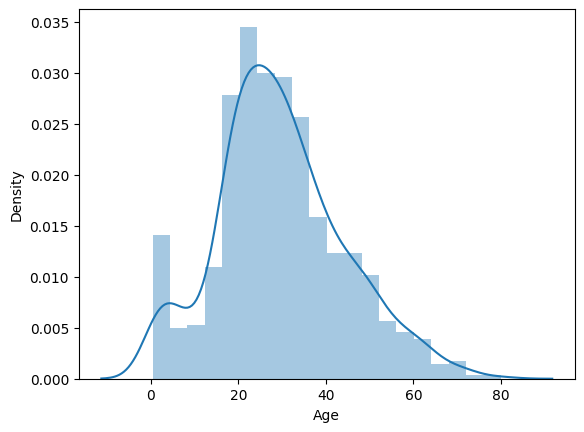

In [5]:
# Checking age Distribution
sns.distplot(titanic_df['Age'])

In [6]:
#filling missing Age value with mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [7]:
# filling missing Embarked value with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [8]:
# Dropping Cabin Column as it has too much missing values.
titanic_df.drop('Cabin', axis=1, inplace=True)

***Univariate Analysis***

Axes(0.125,0.11;0.775x0.77)


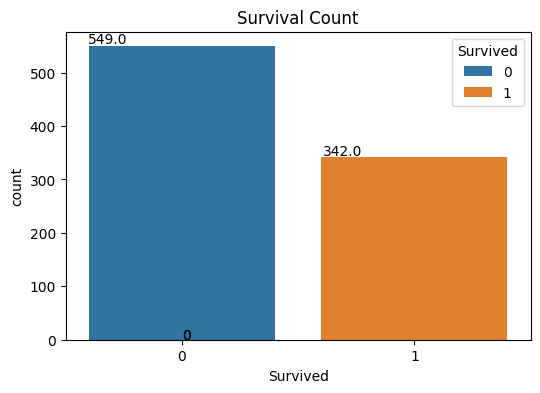

In [9]:
# Checking survival count using countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(data = titanic_df, x='Survived', hue='Survived')
plt.title('Survival Count')
print(ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

Text(0.5, 1.0, 'Age Distribution')

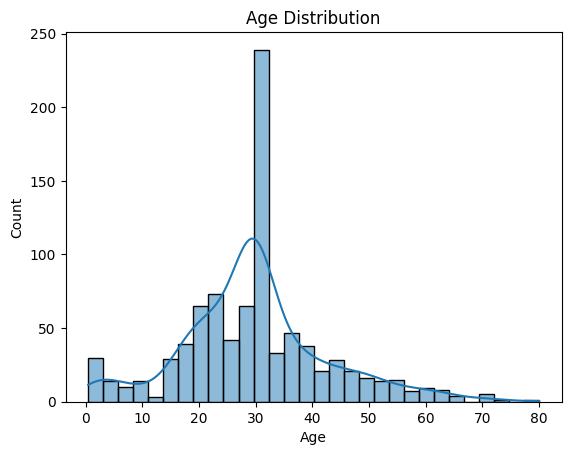

In [10]:
# Checking age Distribution
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution')

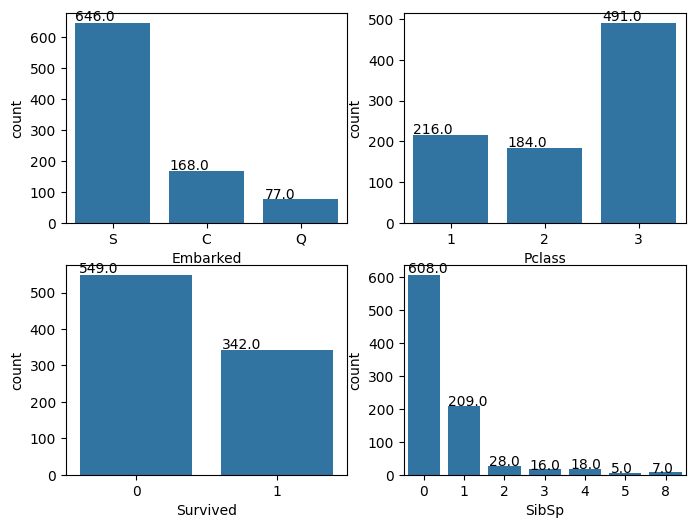

In [11]:
#Count of Survived, Pclass, Embarked and SibSp
plt.subplots(2,2, figsize=(8,6))
plt.subplot(2,2,1)
x = sns.countplot(data=titanic_df, x="Embarked")
for p in x.patches:
    x.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.subplot(2,2,2)
x=sns.countplot(data=titanic_df, x="Pclass")
for p in x.patches:
    x.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.subplot(2,2,3)
x=sns.countplot(data=titanic_df, x="Survived")
for p in x.patches:
    x.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.subplot(2,2,4)
x=sns.countplot(data=titanic_df, x="SibSp")
for p in x.patches:
    x.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

***Bivariate Analysis***

In [12]:
# Male vs Female
titanic_df['Sex'].value_counts()

,count
Sex,
male,577
female,314


Axes(0.125,0.11;0.775x0.77)


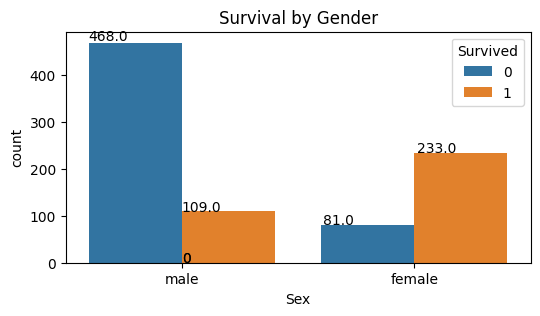

In [13]:
#Survival by Gender
plt.figure(figsize=(6,3))
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Gender')
print(ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

*Females had higher survival rates.*

Axes(0.125,0.11;0.775x0.77)


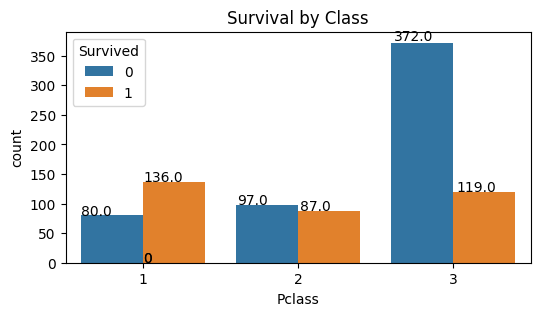

In [14]:
# Survival by Class
plt.figure(figsize=(6,3))
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival by Class')
print(ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

*First-class passengers were more likely to survive.*

<Axes: xlabel='SibSp', ylabel='count'>

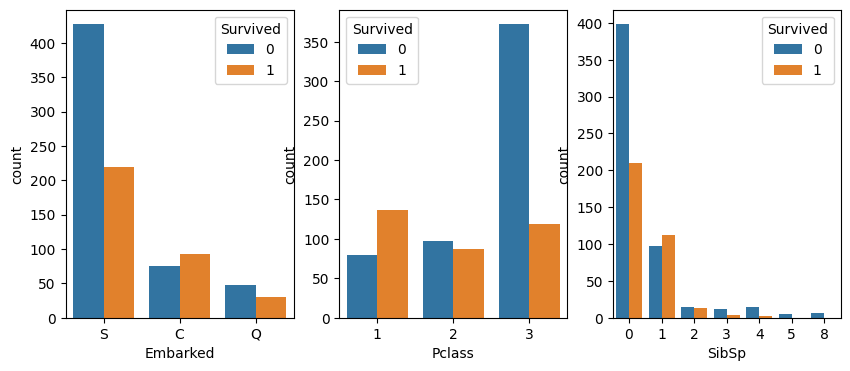

In [15]:
#Count plot of Pclass, Embarked and SibSp with respect to Survived  0=No, 1=Yes
plt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3,1)
sns.countplot(data=titanic_df, x="Embarked", hue='Survived')
plt.subplot(1,3,2)
sns.countplot(data=titanic_df, x="Pclass", hue='Survived')
plt.subplot(1,3,3)
sns.countplot(data=titanic_df, x="SibSp", hue='Survived')

**Checking Statical Desciption of Data**

In [19]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#taking copy of Original data
df_encoded = titanic_df.copy()

In [17]:
# Dropping PassengerID, Name, Ticket as all this of no use
df_encoded.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [18]:
#Encoding categorical columns
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [20]:
# Checking corelation
df_encoded.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.108262
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


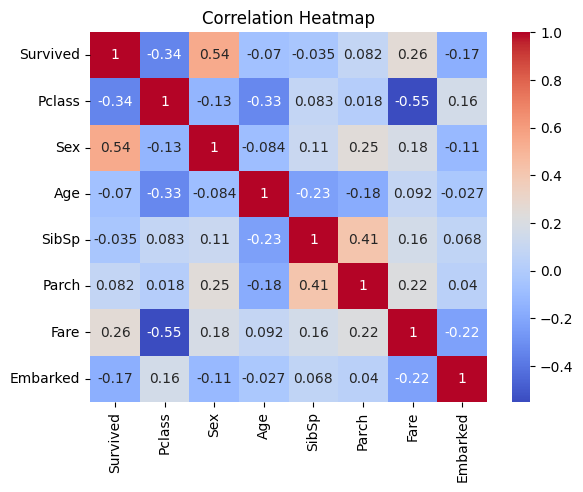

In [21]:
# Correlation using heatmap
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()